# <span style="color:red">  Esercitazione_04</span>

In [18]:
#librerie necessarie

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

### Informazioni utili:

- Le cartelle *<font color="blue">Solid, Liquid, Gas</font>* contengono tutti i codici scritti per la realizzazione dell'esercitazione.
- Nella cartella *<font color="blue">Results</font>* sono già contenuti tutti i risultati di output suddivisi a seconda della fase analizzata. Questi ultimi sono quelli analizzati ed esposti in questo notebook e non è quindi necessaria la ricompilazione e la riesecuzione dei codici; nel caso si volessero rieffettuare le simulazioni è sufficiente digitare *"<font color="green">make run</font>"* da terminale all'interno di ognuna delle cartelle delle fasi poichè questo permette di cancellare tutti i vecchi risultati già presenti prima di crearne altri (la scrittuta dei file avviene appendendo i nuovi risultati ai files di output e quindi una nuova compilazione ed esecuzione prevede la cancellazione di tutti i risultati precedenti). Per poter effettuare invece tutte le simulazioni automaticamente si esegua *<font color="grey">script.sh</font>*.
- Di seguito sono riportati esclusivamente i risultati dell'esercizio *04.4* poichè i codici per ottenerli comprendono tutti i miglioramenti al codice richiesti nei punti precedenti.

## Esercizio 04.4

Sono state effettuate simulazioni di Dinamica Molecolare (MD) nell'ensamble microcanonico (NVE) di un sistema composto da 108 particelle racchiuse in un box dotato di Condizioni Periodiche al Contorno (PBC) utilizzando l'algoritmo di Verlet per integrazione numerica delle equazioni del moto e il modello di Lennard-Jones per l' Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) e Krypton ($\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu) nelle seguenti condizioni termodinamiche:

1. fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cut-off: $r_c^\star = 2.2$)
2. fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cut-off: $r_c^\star = 2.5$)
3. fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cut-off: $r_c^\star = 5.0$)

dove $^\star$ indica le grandezze in unità ridotte.

Utilizzando le unità ridotte per un modello di Lennard-Jones e cioè esprimendo tutte le grandezza in unità di lunghezza $\sigma$, unità di energia $\epsilon$ ed unità di massa $m$, grazie alla legge degli stati corrispondenti è possibile effettuare una sola simulazione per i sistemi considerati; i risultati ottenuti avranno infatti gli stessi andamenti ma possideranno valori diversi quando trasformati nelle unità del Sistema Internazionale. 

Il codice implementato prevede la possibilità di introdurre nel sistema, qualora lo si desiderasse, le correzioni di coda per l'energia potenziale e il viriale ed analizzare i valori istantanei delle grandezze fisiche prese in considerazione.

- La prima fase della simulazione prevede **l'equilibrazione** del sistema:l'algoritmo di Verlet per ottenere le posizioni successive ($\vec{r}(t+dt)$) utilizza quelle al passo precedente ($\vec{r}(t)$) e quelle al passo ancora prima ($\vec{r}(t-dt)$) di conseguenza è quindi necessario fornire una configurazione di input iniziale ($\vec{r}(t)$) e delle velocità iniziali con le quali ottenere $\vec{r}(t-dt)$. Il sistema inizialmente si trova fuori dall'equilibrio poichè la configurazione iniziale scelta è quella di un reticolo FCC mentre le velocità sono distribute uniformemente. Per permettere al sistema di raggiungere l'equilibrio è stato scelto un metodo diverso da quello proposto, il quale prevede invece di lasciar evolvere il sistema a partire da una temperatura iniziale scelta a seconda della fase analizzata finchè questa non raggiunga la temperatura desiderata ($T_{target}$) a cui effettuare la simulazione. Viene scelto un certo numero di passi necessari per la termalizzazione in ognuno dei quali viene fatto evolvere il sistema attraverso l'algoritmo di Verlet. Siccome attraverso questo algoritmo il sistema evolve lentamente, cioè le particelle si spostano di piccoli $\delta x$ ad ogni passo , è stato scelto di calcolare le velocità e quindi la temperatura solo ogni 20 passi; Ottenute queste informazioni si è ricavato il fattore di scala con cui riscalare le velocità e cosi via. 

Di seguito è riportata l'evoluzione della temperatura per ognuna delle fasi durante l'equilibrazione.

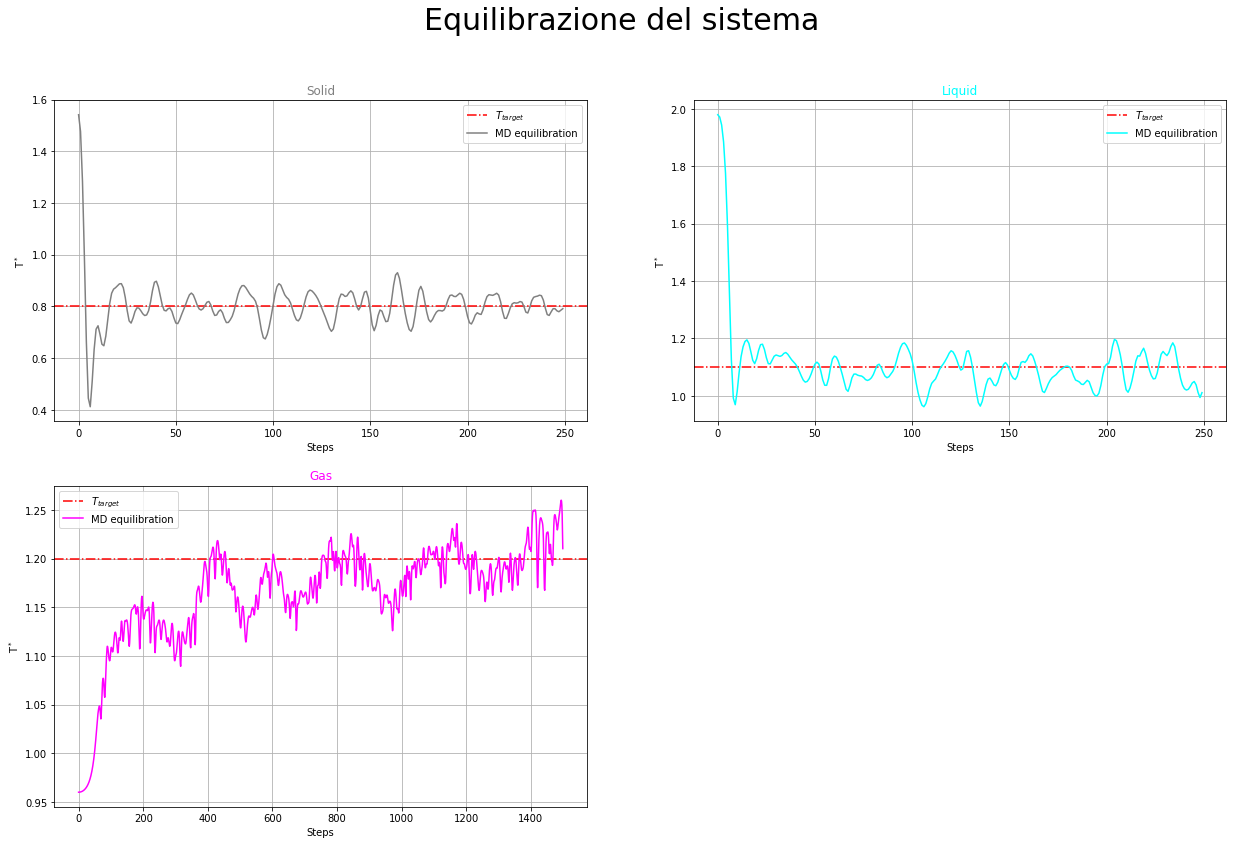

In [19]:
plt.figure(figsize=(21,13))
plt.suptitle('Equilibrazione del sistema',fontsize=30)

plt.subplot(2,2,1)
T = np.loadtxt('Results/Solid/output_restart.out', usecols=(0), delimiter=' ', unpack='true')
plt.axhline(y=0.8,linestyle='-.',color = 'red',label = r'$T_{target}$')
plt.plot(T,label = 'MD equilibration', color = 'gray')
plt.title("Solid",color = 'gray')
plt.ylabel(r'T$^*$')
plt.xlabel(r'Steps')
plt.legend()
plt.grid(True)

plt.subplot(2,2,2)
T = np.loadtxt('Results/Liquid/output_restart.out', usecols=(0), delimiter=' ', unpack='true')
plt.axhline(y=1.1,linestyle='-.',color = 'red',label = r'$T_{target}$')
plt.plot(T,label = 'MD equilibration', color = 'cyan')
plt.title("Liquid",color = 'cyan')
plt.ylabel(r'T$^*$')
plt.xlabel(r'Steps')
plt.legend()
plt.grid(True)

plt.subplot(2,2,3)
T = np.loadtxt('Results/Gas/output_restart.out', usecols=(0), delimiter=' ', unpack='true')
plt.axhline(y=1.2,linestyle='-.',color = 'red',label = r'$T_{target}$')
plt.plot(T,label = 'MD equilibration', color = 'magenta')
plt.ylabel(r'T$^*$')
plt.xlabel(r'Steps')
plt.title("Gas",color = 'magenta')
plt.legend()
plt.grid(True)
plt.show()

Come si può osservare nei grafici la fase solida e quella liquida raggiungono la temperatura designata per la simulazione in un numero molto basso di steps rispetto alla fase gassosa, comportamento imputabile al fatto che le consifurazione di partenza è quella di un reticolo FCC; inoltre è possibile affermare che solido e liquido hanno termalizzato meglio rispetto alla gas in quanto le loro oscillazioni di temperatura attorno a quella desiderata sono più contenute rispetto a quelle del gas.

- La fase di equilibrazione è seguita dalla vera e propria simulazione in cui vengono misurate istantaneamente i valori (ogni 10 steps) dell'energia totale per particella $E/N$, dell'energia potenziale per particella $U/N$, dell'energia cinetica per particella $K/N$, della pressione $P$ e della temperatura $T$ che successivamente sono analizzati con il metodo del *data blocking*. Sono stati effettuati 1000 steps dell'algoritmo per ognuno dei 100 blocchi considerati. 

Di seguito sono riportati i grafici, rispettivamente per Argon e Kripton, dei valori medi delle grandezze fisiche sopracitate con alcune considerazioni.

## Argon

In [20]:
#Conversioni necessarie per ottenere i grafici in unità del Sistema Internazionale

Kb = 1.38E-23             #costante di Boltzmann
sigma = 0.34*(10**(-9))   #Unità di lunghezza in metri
e_Kb = 120.               #e/Kb     
e = (e_Kb*Kb)             #Energia in J
p = e/(sigma**3)          #Pressione in Pa 

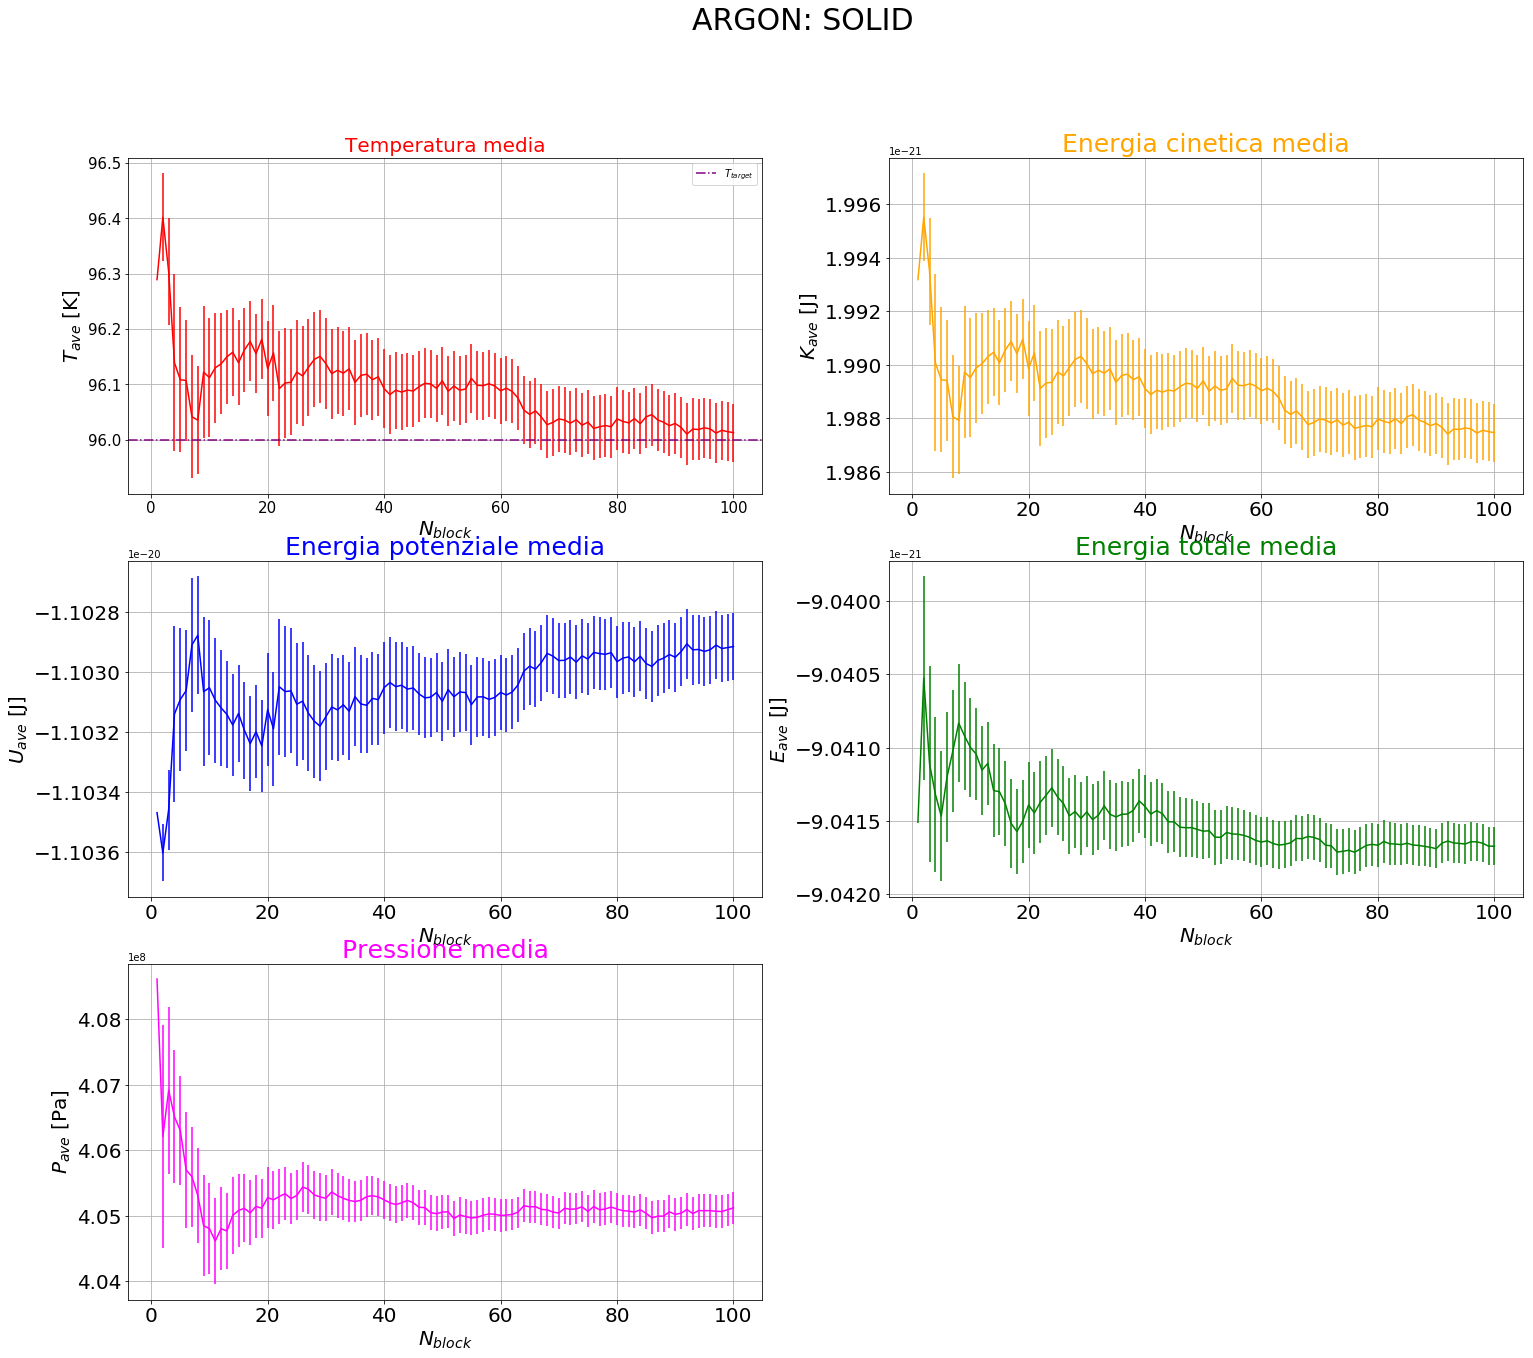

In [21]:
plt.figure(figsize=(25,21))
plt.suptitle('ARGON: SOLID',fontsize=30)

plt.subplot(3,2,1)
N, r, error = np.loadtxt('Results/Solid/ave_temp.out', usecols=(0,1,2), unpack='true')
plt.title("Temperatura media",fontsize=20,color='red')
plt.errorbar(N,r*e_Kb,yerr=error*e_Kb,color='red')
plt.axhline(y=e_Kb*0.8,linestyle='-.',color = 'purple',label = r'$T_{target}$')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'$N_{block}$', fontsize=20)
plt.ylabel('$T_{ave}$ [K]', fontsize = 20)
plt.grid(True)
plt.legend()

plt.subplot(3,2,2)

N, r, error = np.loadtxt('Results/Solid/ave_ekin.out', usecols=(0,1,2), unpack='true')
plt.title("Energia cinetica media",fontsize=25,color='orange')
plt.errorbar(N,r*e,yerr=error*e,color='orange')
plt.xlabel(r'$N_{block}$', fontsize=20)
plt.ylabel('$K_{ave}$ [J]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.subplot(3,2,3)
N, r, error = np.loadtxt('Results/Solid/ave_epot.out', usecols=(0,1,2), unpack='true')
plt.title("Energia potenziale media",fontsize=25,color='blue')
plt.errorbar(N,r*e,yerr=error*e,color='blue')
plt.xlabel(r'$N_{block}$', fontsize=20)
plt.ylabel('$U_{ave}$ [J]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.subplot(3,2,4)
N, r, error = np.loadtxt('Results/Solid/ave_etot.out', usecols=(0,1,2), unpack='true')
plt.title("Energia totale media",fontsize=25,color ='green')
plt.errorbar(N,r*e,yerr=error*e,color ='green')
plt.xlabel(r'$N_{block}$', fontsize=20)
plt.ylabel('$E_{ave}$ [J]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.subplot(3,2,5)

N, r, error = np.loadtxt('Results/Solid/ave_pres.out', usecols=(0,1,2), unpack='true')
plt.title("Pressione media",fontsize=25,color='magenta')
plt.errorbar(N,r*p,yerr=error*p, color='magenta')
plt.xlabel('$N_{block}$', fontsize=20)
plt.ylabel('$P_{ave}$ [Pa]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.show()

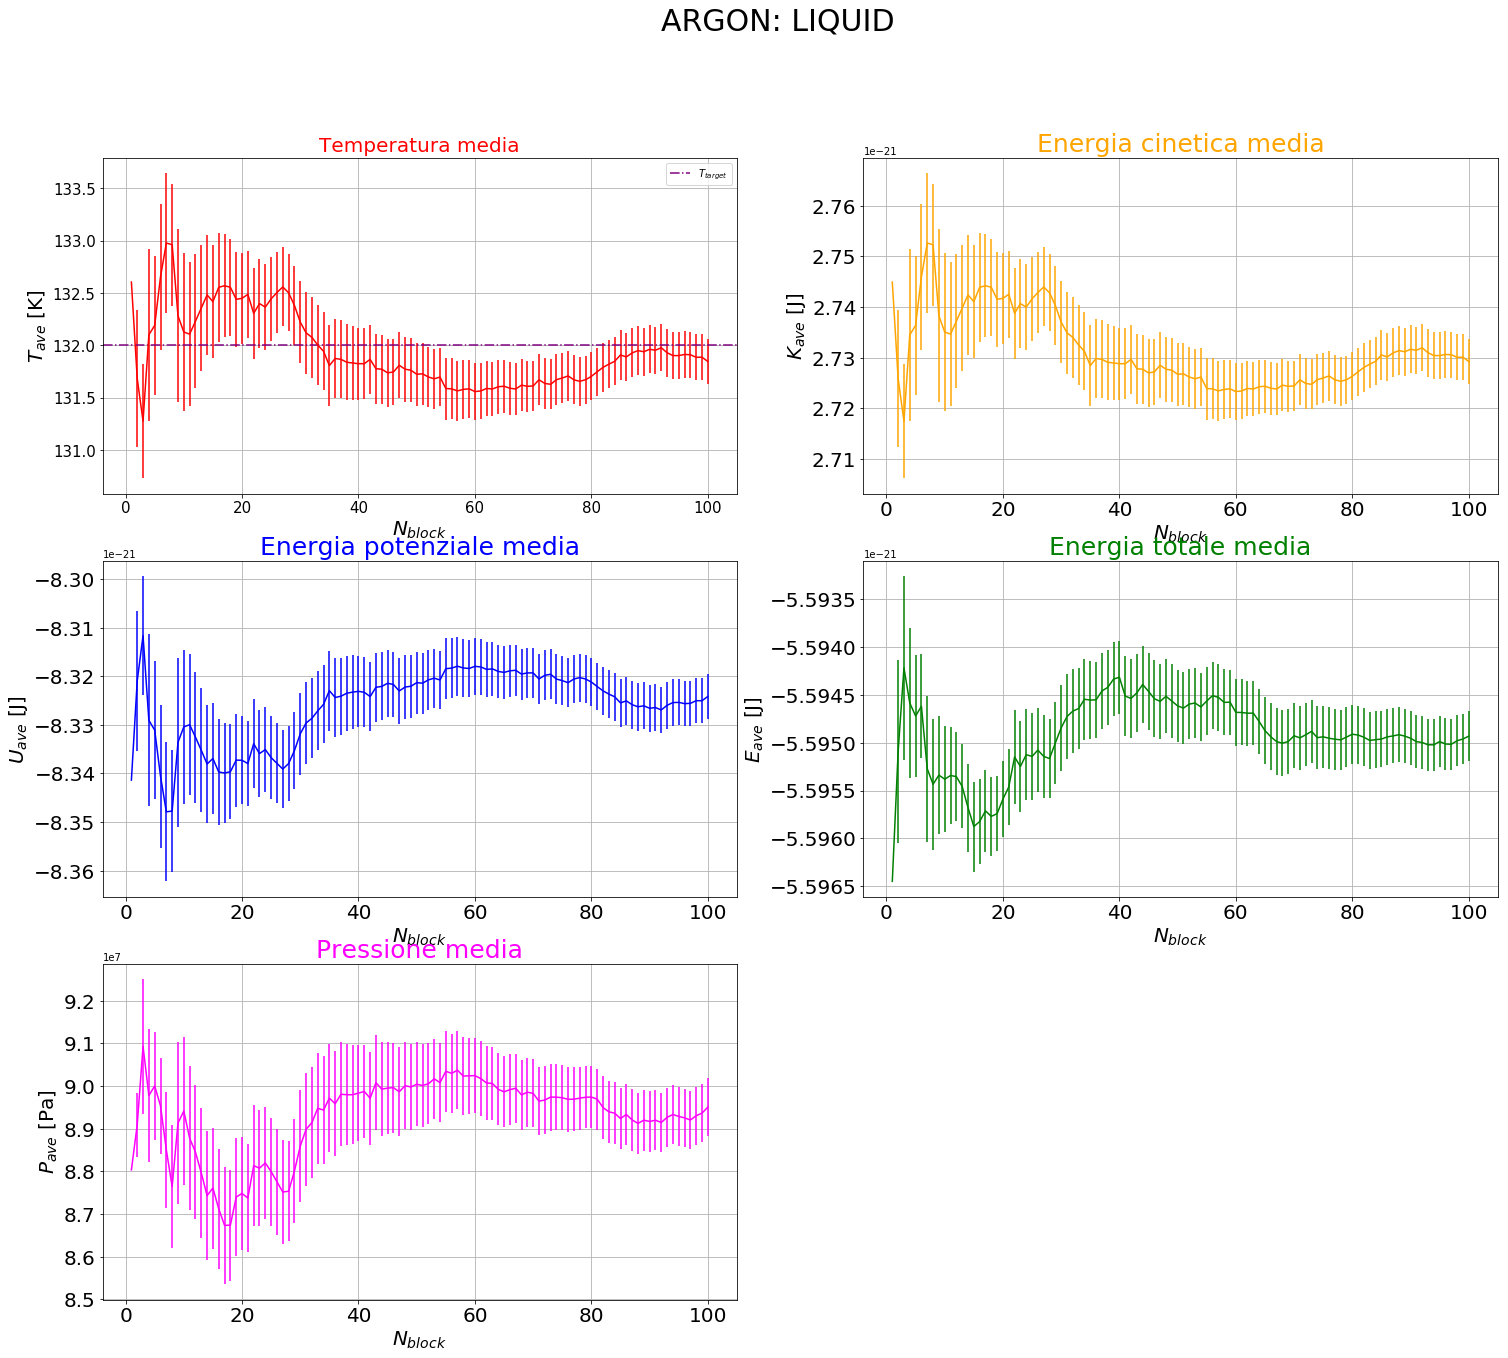

In [22]:
plt.figure(figsize=(25,21))
plt.suptitle('ARGON: LIQUID',fontsize=30)

plt.subplot(3,2,1)
N, r, error = np.loadtxt('Results/Liquid/ave_temp.out', usecols=(0,1,2), unpack='true')
plt.title("Temperatura media",fontsize=20,color='red')
plt.errorbar(N,r*e_Kb,yerr=error*e_Kb,color='red')
plt.axhline(y=e_Kb*1.1,linestyle='-.',color = 'purple',label = r'$T_{target}$')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'$N_{block}$', fontsize=20)
plt.ylabel('$T_{ave}$ [K]', fontsize = 20)
plt.grid(True)
plt.legend()

plt.subplot(3,2,2)

N, r, error = np.loadtxt('Results/Liquid/ave_ekin.out', usecols=(0,1,2), unpack='true')
plt.title("Energia cinetica media",fontsize=25,color='orange')
plt.errorbar(N,r*e,yerr=error*e,color='orange')
plt.xlabel(r'$N_{block}$', fontsize=20)
plt.ylabel('$K_{ave}$ [J]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.subplot(3,2,3)
N, r, error = np.loadtxt('Results/Liquid/ave_epot.out', usecols=(0,1,2), unpack='true')
plt.title("Energia potenziale media",fontsize=25,color='blue')
plt.errorbar(N,r*e,yerr=error*e,color='blue')
plt.xlabel(r'$N_{block}$', fontsize=20)
plt.ylabel('$U_{ave}$ [J]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.subplot(3,2,4)
N, r, error = np.loadtxt('Results/Liquid/ave_etot.out', usecols=(0,1,2), unpack='true')
plt.title("Energia totale media",fontsize=25,color ='green')
plt.errorbar(N,r*e,yerr=error*e,color ='green')
plt.xlabel(r'$N_{block}$', fontsize=20)
plt.ylabel('$E_{ave}$ [J]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.subplot(3,2,5)

N, r, error = np.loadtxt('Results/Liquid/ave_pres.out', usecols=(0,1,2), unpack='true')
plt.title("Pressione media",fontsize=25,color='magenta')
plt.errorbar(N,r*p,yerr=error*p, color='magenta')
plt.xlabel('$N_{block}$', fontsize=20)
plt.ylabel('$P_{ave}$ [Pa]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.show()

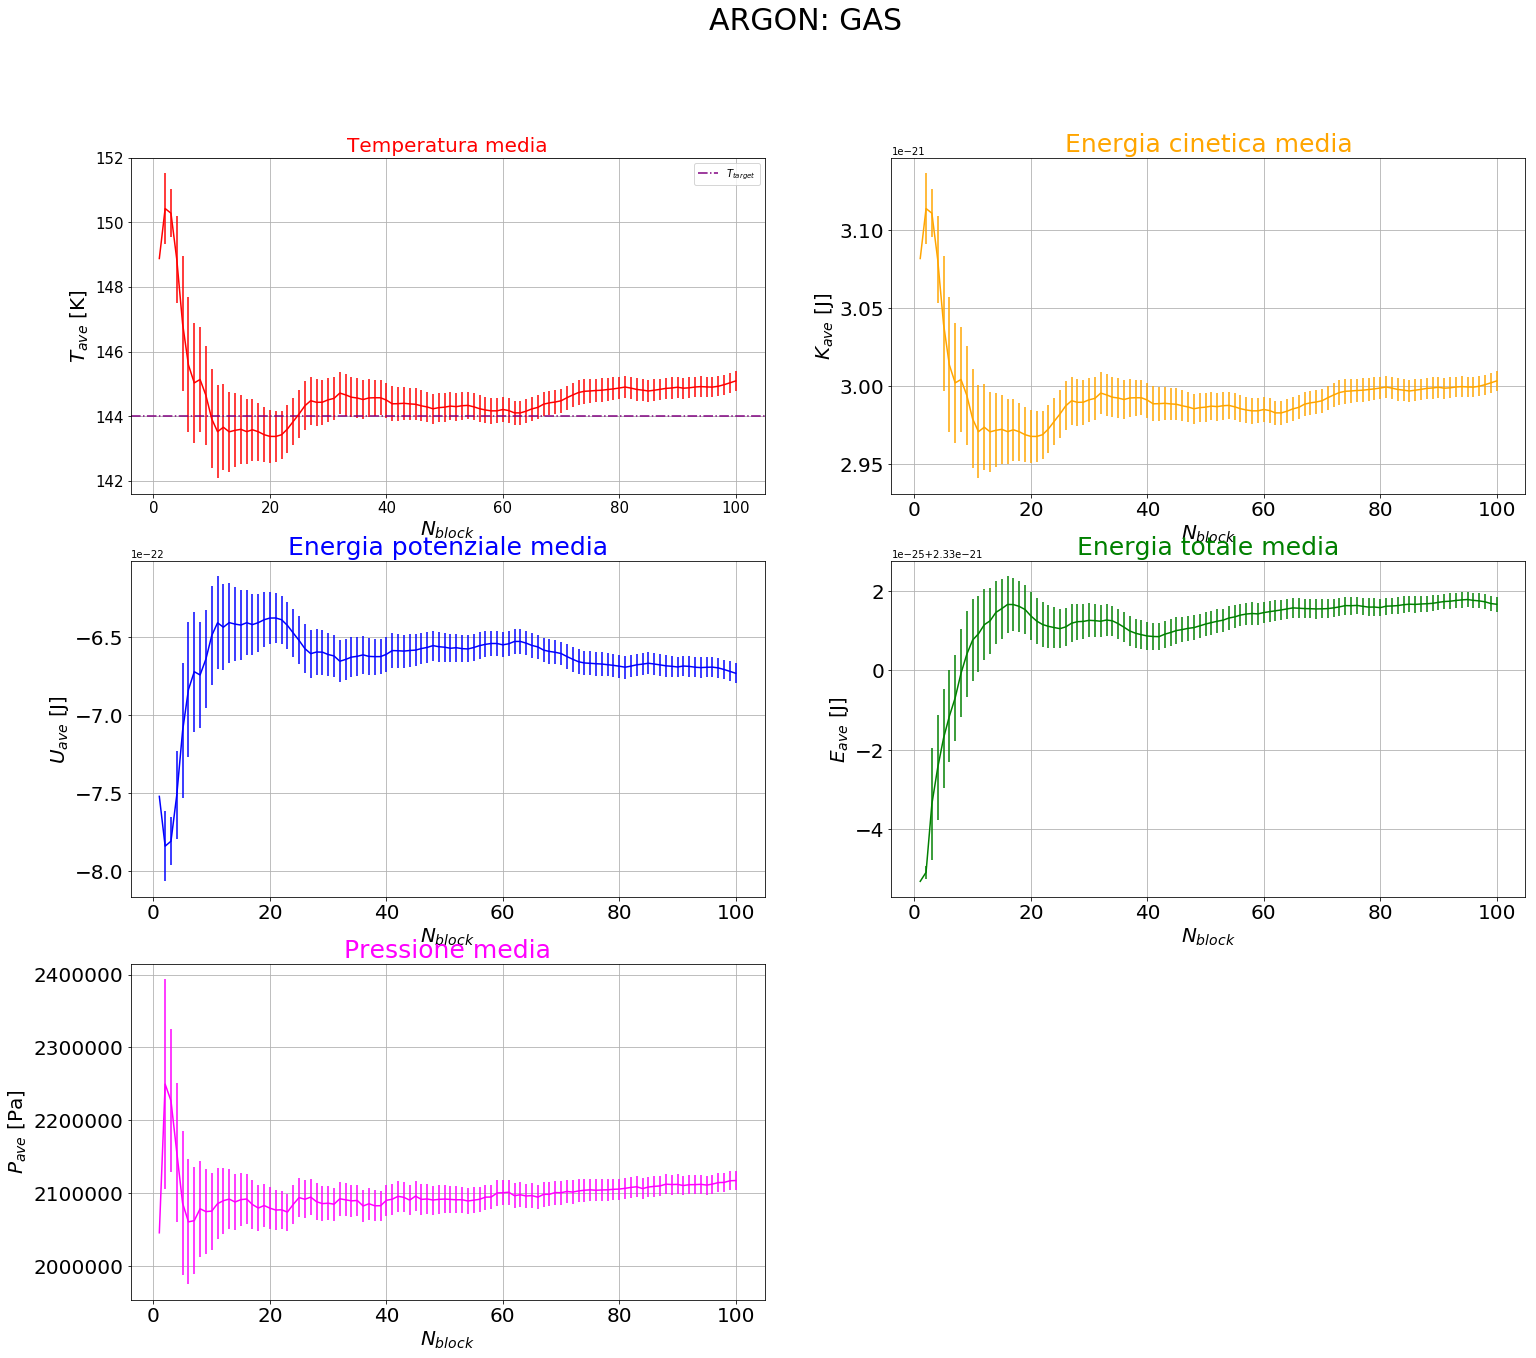

In [23]:
plt.figure(figsize=(25,21))
plt.suptitle('ARGON: GAS',fontsize=30)

plt.subplot(3,2,1)
N, r, error = np.loadtxt('Results/Gas/ave_temp.out', usecols=(0,1,2), unpack='true')
plt.title("Temperatura media",fontsize=20,color='red')
plt.errorbar(N,r*e_Kb,yerr=error*e_Kb,color='red')
plt.axhline(y=e_Kb*1.2,linestyle='-.',color = 'purple',label = r'$T_{target}$')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'$N_{block}$', fontsize=20)
plt.ylabel('$T_{ave}$ [K]', fontsize = 20)
plt.grid(True)
plt.legend()

plt.subplot(3,2,2)

N, r, error = np.loadtxt('Results/Gas/ave_ekin.out', usecols=(0,1,2), unpack='true')
plt.title("Energia cinetica media",fontsize=25,color='orange')
plt.errorbar(N,r*e,yerr=error*e,color='orange')
plt.xlabel(r'$N_{block}$', fontsize=20)
plt.ylabel('$K_{ave}$ [J]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.subplot(3,2,3)
N, r, error = np.loadtxt('Results/Gas/ave_epot.out', usecols=(0,1,2), unpack='true')
plt.title("Energia potenziale media",fontsize=25,color='blue')
plt.errorbar(N,r*e,yerr=error*e,color='blue')
plt.xlabel(r'$N_{block}$', fontsize=20)
plt.ylabel('$U_{ave}$ [J]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.subplot(3,2,4)
N, r, error = np.loadtxt('Results/Gas/ave_etot.out', usecols=(0,1,2), unpack='true')
plt.title("Energia totale media",fontsize=25,color ='green')
plt.errorbar(N,r*e,yerr=error*e,color ='green')
plt.xlabel(r'$N_{block}$', fontsize=20)
plt.ylabel('$E_{ave}$ [J]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.subplot(3,2,5)

N, r, error = np.loadtxt('Results/Gas/ave_pres.out', usecols=(0,1,2), unpack='true')
plt.title("Pressione media",fontsize=25,color='magenta')
plt.errorbar(N,r*p,yerr=error*p, color='magenta')
plt.xlabel('$N_{block}$', fontsize=20)
plt.ylabel('$P_{ave}$ [Pa]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.show()

## Kripton

In [24]:
#Conversioni necessarie per ottenere i grafici in unità del Sistema Internazionale

Kb = 1.38E-23              #Costante di Boltzmann
sigma = 0.364*(10**(-9))   #Unità di lunghezza in metri
e_Kb = 164.                #e/Kb
e = (e_Kb*Kb)              #Energia in J
p = e/(sigma**3)           #Pressione in Pa 

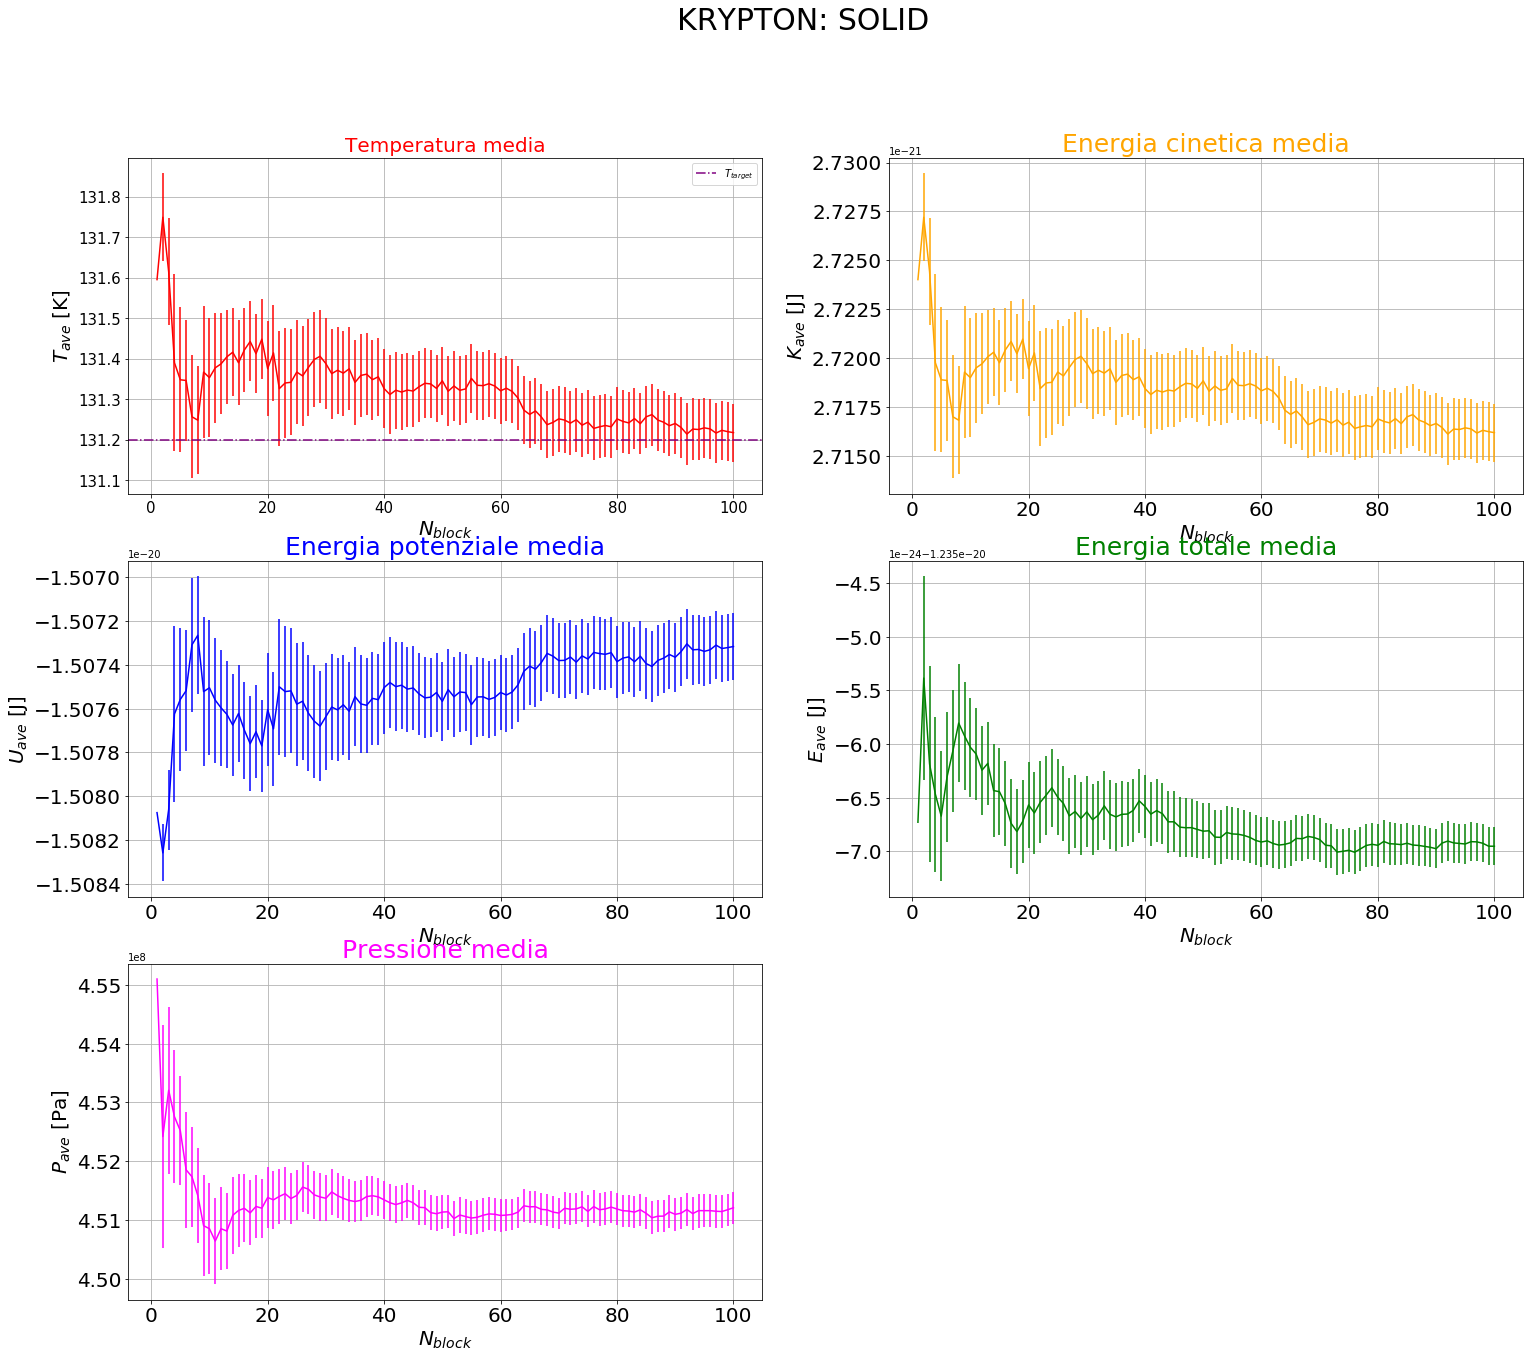

In [25]:
plt.figure(figsize=(25,21))
plt.suptitle('KRYPTON: SOLID',fontsize=30)

plt.subplot(3,2,1)
N, r, error = np.loadtxt('Results/Solid/ave_temp.out', usecols=(0,1,2), unpack='true')
plt.title("Temperatura media",fontsize=20,color='red')
plt.errorbar(N,r*e_Kb,yerr=error*e_Kb,color='red')
plt.axhline(y=e_Kb*0.8,linestyle='-.',color = 'purple',label = r'$T_{target}$')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'$N_{block}$', fontsize=20)
plt.ylabel('$T_{ave}$ [K]', fontsize = 20)
plt.grid(True)
plt.legend()

plt.subplot(3,2,2)

N, r, error = np.loadtxt('Results/Solid/ave_ekin.out', usecols=(0,1,2), unpack='true')
plt.title("Energia cinetica media",fontsize=25,color='orange')
plt.errorbar(N,r*e,yerr=error*e,color='orange')
plt.xlabel(r'$N_{block}$', fontsize=20)
plt.ylabel('$K_{ave}$ [J]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.subplot(3,2,3)
N, r, error = np.loadtxt('Results/Solid/ave_epot.out', usecols=(0,1,2), unpack='true')
plt.title("Energia potenziale media",fontsize=25,color='blue')
plt.errorbar(N,r*e,yerr=error*e,color='blue')
plt.xlabel(r'$N_{block}$', fontsize=20)
plt.ylabel('$U_{ave}$ [J]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.subplot(3,2,4)
N, r, error = np.loadtxt('Results/Solid/ave_etot.out', usecols=(0,1,2), unpack='true')
plt.title("Energia totale media",fontsize=25,color ='green')
plt.errorbar(N,r*e,yerr=error*e,color ='green')
plt.xlabel(r'$N_{block}$', fontsize=20)
plt.ylabel('$E_{ave}$ [J]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.subplot(3,2,5)

N, r, error = np.loadtxt('Results/Solid/ave_pres.out', usecols=(0,1,2), unpack='true')
plt.title("Pressione media",fontsize=25,color='magenta')
plt.errorbar(N,r*p,yerr=error*p, color='magenta')
plt.xlabel('$N_{block}$', fontsize=20)
plt.ylabel('$P_{ave}$ [Pa]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.show()

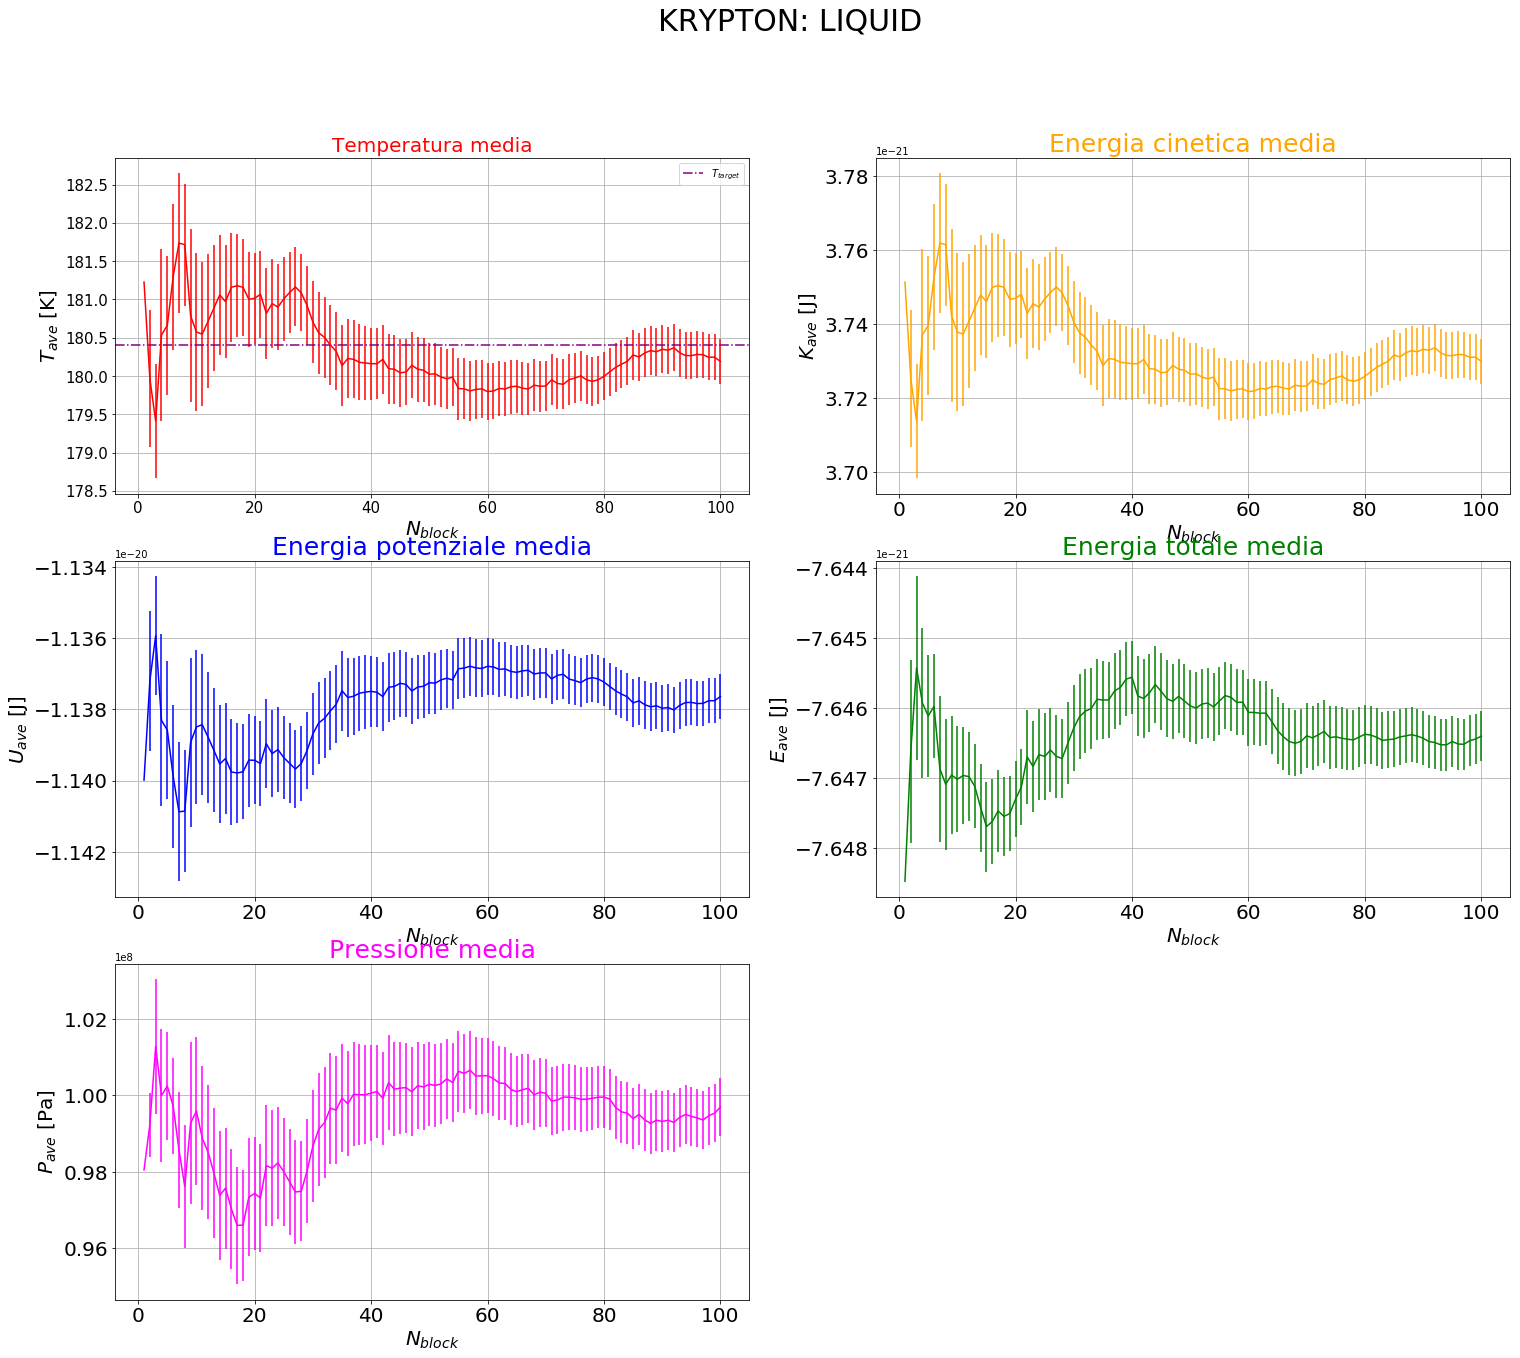

In [26]:
plt.figure(figsize=(25,21))
plt.suptitle('KRYPTON: LIQUID',fontsize=30)

plt.subplot(3,2,1)
N, r, error = np.loadtxt('Results/Liquid/ave_temp.out', usecols=(0,1,2), unpack='true')
plt.title("Temperatura media",fontsize=20,color='red')
plt.errorbar(N,r*e_Kb,yerr=error*e_Kb,color='red')
plt.axhline(y=e_Kb*1.1,linestyle='-.',color = 'purple',label = r'$T_{target}$')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'$N_{block}$', fontsize=20)
plt.ylabel('$T_{ave}$ [K]', fontsize = 20)
plt.grid(True)
plt.legend()

plt.subplot(3,2,2)

N, r, error = np.loadtxt('Results/Liquid/ave_ekin.out', usecols=(0,1,2), unpack='true')
plt.title("Energia cinetica media",fontsize=25,color='orange')
plt.errorbar(N,r*e,yerr=error*e,color='orange')
plt.xlabel(r'$N_{block}$', fontsize=20)
plt.ylabel('$K_{ave}$ [J]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.subplot(3,2,3)
N, r, error = np.loadtxt('Results/Liquid/ave_epot.out', usecols=(0,1,2), unpack='true')
plt.title("Energia potenziale media",fontsize=25,color='blue')
plt.errorbar(N,r*e,yerr=error*e,color='blue')
plt.xlabel(r'$N_{block}$', fontsize=20)
plt.ylabel('$U_{ave}$ [J]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.subplot(3,2,4)
N, r, error = np.loadtxt('Results/Liquid/ave_etot.out', usecols=(0,1,2), unpack='true')
plt.title("Energia totale media",fontsize=25,color ='green')
plt.errorbar(N,r*e,yerr=error*e,color ='green')
plt.xlabel(r'$N_{block}$', fontsize=20)
plt.ylabel('$E_{ave}$ [J]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.subplot(3,2,5)

N, r, error = np.loadtxt('Results/Liquid/ave_pres.out', usecols=(0,1,2), unpack='true')
plt.title("Pressione media",fontsize=25,color='magenta')
plt.errorbar(N,r*p,yerr=error*p, color='magenta')
plt.xlabel('$N_{block}$', fontsize=20)
plt.ylabel('$P_{ave}$ [Pa]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.show()

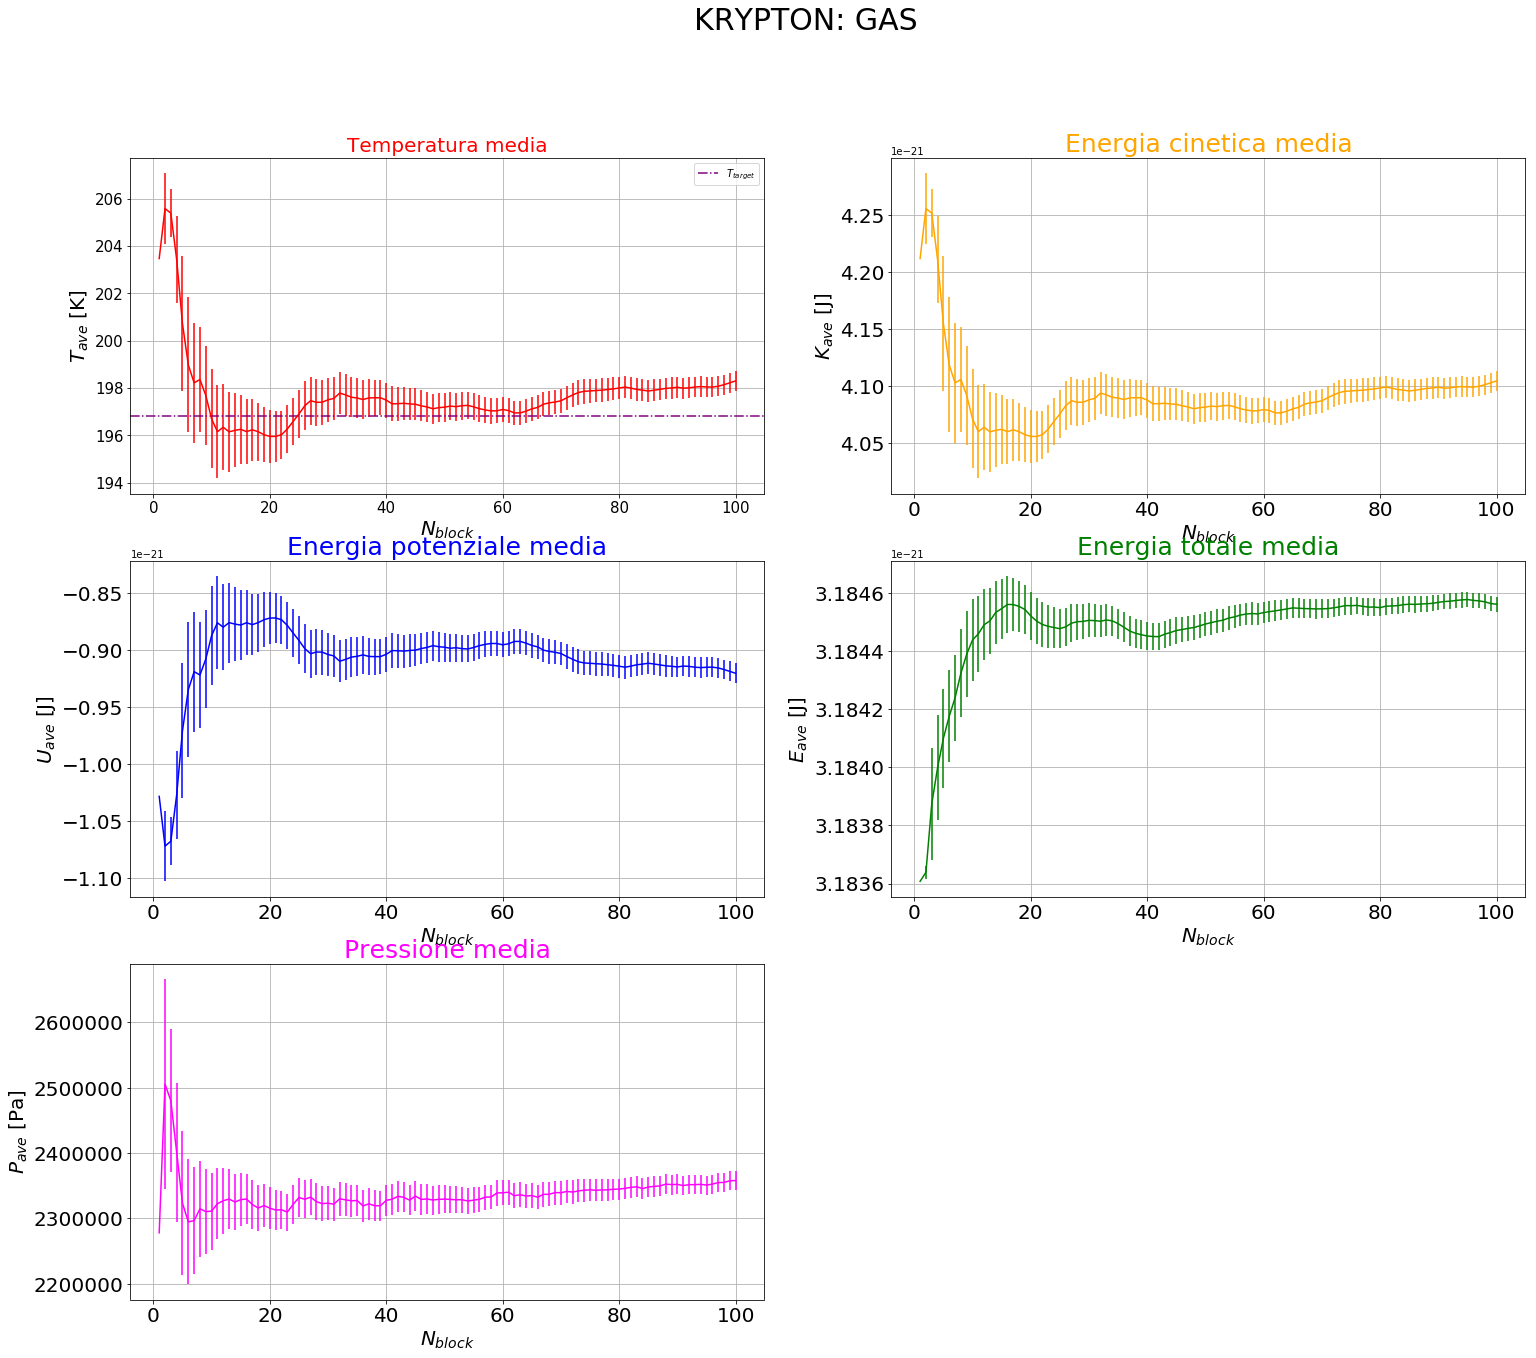

In [27]:
plt.figure(figsize=(25,21))
plt.suptitle('KRYPTON: GAS',fontsize=30)

plt.subplot(3,2,1)
N, r, error = np.loadtxt('Results/Gas/ave_temp.out', usecols=(0,1,2), unpack='true')
plt.title("Temperatura media",fontsize=20,color='red')
plt.errorbar(N,r*e_Kb,yerr=error*e_Kb,color='red')
plt.axhline(y=e_Kb*1.2,linestyle='-.',color = 'purple',label = r'$T_{target}$')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'$N_{block}$', fontsize=20)
plt.ylabel('$T_{ave}$ [K]', fontsize = 20)
plt.grid(True)
plt.legend()

plt.subplot(3,2,2)

N, r, error = np.loadtxt('Results/Gas/ave_ekin.out', usecols=(0,1,2), unpack='true')
plt.title("Energia cinetica media",fontsize=25,color='orange')
plt.errorbar(N,r*e,yerr=error*e,color='orange')
plt.xlabel(r'$N_{block}$', fontsize=20)
plt.ylabel('$K_{ave}$ [J]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.subplot(3,2,3)
N, r, error = np.loadtxt('Results/Gas/ave_epot.out', usecols=(0,1,2), unpack='true')
plt.title("Energia potenziale media",fontsize=25,color='blue')
plt.errorbar(N,r*e,yerr=error*e,color='blue')
plt.xlabel(r'$N_{block}$', fontsize=20)
plt.ylabel('$U_{ave}$ [J]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.subplot(3,2,4)
N, r, error = np.loadtxt('Results/Gas/ave_etot.out', usecols=(0,1,2), unpack='true')
plt.title("Energia totale media",fontsize=25,color ='green')
plt.errorbar(N,r*e,yerr=error*e,color ='green')
plt.xlabel(r'$N_{block}$', fontsize=20)
plt.ylabel('$E_{ave}$ [J]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.subplot(3,2,5)

N, r, error = np.loadtxt('Results/Gas/ave_pres.out', usecols=(0,1,2), unpack='true')
plt.title("Pressione media",fontsize=25,color='magenta')
plt.errorbar(N,r*p,yerr=error*p, color='magenta')
plt.xlabel('$N_{block}$', fontsize=20)
plt.ylabel('$P_{ave}$ [Pa]', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.show()

- Considerazioni finali:
    1. Nella fase solida e liquida di entrambi i sistemi si può notare come la temperatura converga correttamente al volore desiderato; nella fase gassosa invece vi è una discrepanza tra i valori ottenuti e quelli desiderati sintomo del fatto che non si è riuscito ad equilibrare al meglio il gas.
    2. La simulazione è da considersi corretta poichè per entrambi i sistemi si può osservare la conservazione dell'energia totale rispettando così l'assunzione di ensamble microcanonico.
    3. Come ci si aspetterebbe l'energia potenziale risulta essere maggiore di quella cinetica nel solido, minore nel gas e dello stesso ordine di grandezza nella fase liquida.        